## Exercise 8 - Algebra

Marit Svendby Otervik

In [2]:
import numpy as np
import numpy.random as npr
from scipy import linalg as la
import matplotlib.pyplot as plt

### 1. PCA on 3D dataset

In [3]:
N = 1000

x1 = npr.normal(loc=0,scale=1,size=N)
x2 = x1 + npr.normal(loc=0,scale=3,size=N)
x3 = 2*x1 + x2

#Creating a Nx3 matrix from the array
x = np.vstack([x1,x2,x3])
print(x)

[[-0.84026734 -0.73908497  0.83403235 ... -2.08359934 -0.60618635
  -1.83526414]
 [-2.21666928 -4.22485042 -0.2240384  ... -2.12150341  0.82056285
  -1.75161941]
 [-3.89720395 -5.70302037  1.4440263  ... -6.28870209 -0.39180984
  -5.42214769]]


##### PCA with eigendecomposition

In [4]:
#Computing the covariance matrix
cov = np.cov(x)
print("Covariance matrix:\n",cov,"\n")

#Eigenvectors and calues of the covariance matrix
l, V = la.eig(cov)
l = np.real_if_close(l)

print("Eigenvalues:\n", l, '\n')
print("Eigenvectors:\n", V, '\n')

Covariance matrix:
 [[ 0.99428379  0.9591741   2.94774169]
 [ 0.9591741  10.17044141 12.08878961]
 [ 2.94774169 12.08878961 17.98427299]] 

Eigenvalues:
 [2.71149251e+01 1.24927422e-15 2.03407313e+00] 

Eigenvectors:
 [[-0.11229246 -0.81649658  0.56632476]
 [-0.58131089 -0.40824829 -0.70385438]
 [-0.80589581  0.40824829  0.42879515]] 



##### PCA with SVD

In [5]:
#SVD on the dataset
U, S, Vt = np.linalg.svd(x)
#Rescaling S to get the eigenvalues:
l_svd = S**2/(N-1)
#Eigenvectors
V_svd = U

print("Eigenvalues:\n", l_svd, '\n')
print("Eigenvectors:\n", V_svd, '\n')

Eigenvalues:
 [2.71788870e+01 2.04352959e+00 6.92038114e-30] 

Eigenvectors:
 [[-0.11284713  0.5662145  -0.81649658]
 [-0.58062118 -0.70442344 -0.40824829]
 [-0.80631543  0.42800556  0.40824829]] 



In [6]:
# Compare Eigenvalues
print("Eigendecomposition:\n", l)
print("SVD:\n", l_svd)

Eigendecomposition:
 [2.71149251e+01 1.24927422e-15 2.03407313e+00]
SVD:
 [2.71788870e+01 2.04352959e+00 6.92038114e-30]


The high eigenvalues are similar, but the small ones are not (but they are both really small)

In [7]:
# Compare Eigenvectors
print("Eigendecomposition:\n", V)
print("SVD:\n", V_svd)

Eigendecomposition:
 [[-0.11229246 -0.81649658  0.56632476]
 [-0.58131089 -0.40824829 -0.70385438]
 [-0.80589581  0.40824829  0.42879515]]
SVD:
 [[-0.11284713  0.5662145  -0.81649658]
 [-0.58062118 -0.70442344 -0.40824829]
 [-0.80631543  0.42800556  0.40824829]]


The eigenvectors are similar with precision ~ 10^(-6)

##### Computing variability of each principal component

In [8]:
Lambda = np.diag(l_svd)
for i in range(3):
    print("PC %.0f : %2.1f%% of the total variability" % (i, Lambda[i,i]/Lambda.trace()*100))

PC 0 : 93.0% of the total variability
PC 1 : 7.0% of the total variability
PC 2 : 0.0% of the total variability


We can see that the majority of the datataset's total variability are from the first principal component, and that the two first principal components make close to 100% of the variability (not exactly 100%, but the eigenvalue of PC3 is very small). This makes sense because x1 is a  random normal distribution, while x2 is the sum of x1 and a random normal distribution. Further, x3 is a linear combination of 2x1 and x2. Hence, x1 is a part of the other two variables, and the variability from creating x1 will dominate the total variability in the dataset.

By selecting only the first two components (trducing the dimensionality), more than 99% of the total variability will be retained.


In [9]:
#Redifine data according to the new basis
xp = np.dot(V_svd.T, x)

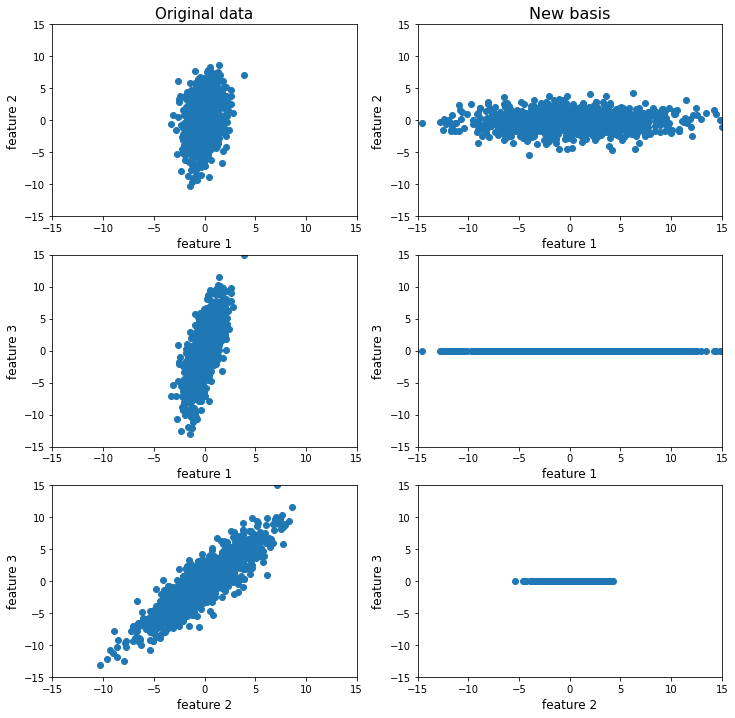

In [10]:
fig, axes = plt.subplots(nrows=3,ncols=2,figsize=(12,12))
ax00,ax01,ax10,ax11,ax20,ax21 = axes.flatten()
plt.setp(axes, xlim=(-15,15), ylim=(-15,15))
#ax00.xaxis.set_ticks(np.arange(0, 57, 8))

ax00.scatter(x[0,:], x[1,:])
ax00.set_xlabel('feature 1', fontsize=12)
ax00.set_ylabel('feature 2', fontsize=12)
ax00.set_title('Original data',fontsize=15)

ax10.scatter(x[0,:], x[2,:])
ax10.set_xlabel('feature 1', fontsize=12)
ax10.set_ylabel('feature 3', fontsize=12)

ax20.scatter(x[1,:], x[2,:])
ax20.set_xlabel('feature 2', fontsize=12)
ax20.set_ylabel('feature 3', fontsize=12)

ax01.scatter(xp[0,:], xp[1,:])
ax01.set_xlabel('feature 1', fontsize=12)
ax01.set_ylabel('feature 2', fontsize=12)
ax01.set_title('New basis',fontsize=16)

ax11.scatter(xp[0,:], xp[2,:])
ax11.set_xlabel('feature 1', fontsize=12)
ax11.set_ylabel('feature 3', fontsize=12)

ax21.scatter(xp[1,:], xp[2,:])
ax21.set_xlabel('feature 2', fontsize=12)
ax21.set_ylabel('feature 3', fontsize=12)

plt.show()

When plotting in the new basis, we can clearly see the same as we calculated earlier; feature 1 is responsible for the majority of the variability, while feature 3 has close to none. Hence, feature 3 could be removed, and still at least 99% of the total variability is retained. 

### 2. PCA on a nD dataset

In [11]:
#creating random noise (10 uncorrelated variables normally dist.)
noise1 = npr.normal(loc=0,scale=1/20,size=N)
noise2 = npr.normal(loc=0,scale=2/20,size=N)
noise3 = npr.normal(loc=0,scale=3/20,size=N)
noise4 = npr.normal(loc=0,scale=1/20,size=N)
noise5 = npr.normal(loc=0,scale=2/20,size=N)
noise6 = npr.normal(loc=0,scale=3/20,size=N)
noise7 = npr.normal(loc=0,scale=1/20,size=N)
noise8 = npr.normal(loc=0,scale=2/20,size=N)
noise9 = npr.normal(loc=0,scale=3/20,size=N)
noise10 = npr.normal(loc=0,scale=1/20,size=N)

x_nD = np.vstack([x1,x2,x3,noise1,noise2,noise3,noise4,noise5,noise6,noise7,noise8,noise9,noise10])

##### PCA with eigendecomposition

In [12]:
#Computing the covariance matrix
cov_nD = np.cov(x_nD)

#Eigenvectors and calues of the covariance matrix
l_nD, V_nD = la.eig(cov_nD)
l_nD = np.real_if_close(l_nD)

print("Eigenvalues:\n", l_nD, '\n')
#print("Eigenvectors:\n", V_nD, '\n')

Eigenvalues:
 [2.71150380e+01 2.03411322e+00 2.44143750e-02 2.18061432e-02
 2.12270055e-02 3.08103147e-15 1.04327042e-02 9.96304283e-03
 9.36762385e-03 2.41681812e-03 2.46605126e-03 2.74064952e-03
 2.65920068e-03] 



As expected, we get 13 eiegnvalues: x1, x2, x3 + 10 noise-variables

##### PCA with SVD

In [13]:
#SVD on the dataset
U_nD, S_nD, Vt = np.linalg.svd(x_nD)
#Rescaling S to get the eigenvalues:
l_svd_nD = S_nD**2/(N-1)
#Eigenvectors
V_svd_nD = U_nD

print("Eigenvalues:\n", l_svd_nD, '\n')
#print("Eigenvectors:\n", V_svd_noise, '\n')

Eigenvalues:
 [2.71789958e+01 2.04357208e+00 2.44145063e-02 2.18948716e-02
 2.12330015e-02 1.04333311e-02 9.98581143e-03 9.36864037e-03
 2.74085068e-03 2.65920756e-03 2.47804055e-03 2.41688808e-03
 6.78715152e-30] 



In [14]:
# Compare Eigenvalues
print("Eigendecomposition:\n", l_nD)
print("\nSVD:\n", l_svd_nD)

Eigendecomposition:
 [2.71150380e+01 2.03411322e+00 2.44143750e-02 2.18061432e-02
 2.12270055e-02 3.08103147e-15 1.04327042e-02 9.96304283e-03
 9.36762385e-03 2.41681812e-03 2.46605126e-03 2.74064952e-03
 2.65920068e-03]

SVD:
 [2.71789958e+01 2.04357208e+00 2.44145063e-02 2.18948716e-02
 2.12330015e-02 1.04333311e-02 9.98581143e-03 9.36864037e-03
 2.74085068e-03 2.65920756e-03 2.47804055e-03 2.41688808e-03
 6.78715152e-30]


##### Computing variability of each principal component

In [15]:
Lambda_nD = np.diag(l_svd_nD)
for i in range(13):
    print("PC %.0f : %2.5f%% of the total variability" % (i, Lambda_nD[i,i]/Lambda_nD.trace()*100))

PC 0 : 92.66559% of the total variability
PC 1 : 6.96747% of the total variability
PC 2 : 0.08324% of the total variability
PC 3 : 0.07465% of the total variability
PC 4 : 0.07239% of the total variability
PC 5 : 0.03557% of the total variability
PC 6 : 0.03405% of the total variability
PC 7 : 0.03194% of the total variability
PC 8 : 0.00934% of the total variability
PC 9 : 0.00907% of the total variability
PC 10 : 0.00845% of the total variability
PC 11 : 0.00824% of the total variability
PC 12 : 0.00000% of the total variability


We can see that the standard deviation of the generated random noise is of such a small factor that they don't contribute much to the total variability of the system. Hence, we get a very similar result to those obtained earlier (PC 0: 93%, PC 1: 7%)